<a href="https://colab.research.google.com/github/Amehroke/MachineLearning/blob/main/Harris_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer vision Harris Corner Detection implementation

In [1]:
# Import the 'imread' function from the 'skimage.io' library to read images.
from skimage.io import imread
# Import the 'rgb2gray' function from the 'skimage.color' library to convert the image to grayscale.
from skimage.color import rgb2gray
# Import 'numpy' as 'np' to use NumPy for numerical operations.
import numpy as np
# Import 'matplotlib.pyplot' as 'plt' to display images and plots.
import matplotlib.pyplot as plt
# Import 'corner_peaks' from 'skimage.feature' to find corner points in the image.
from skimage.feature import corner_peaks
# Import 'convolve2d' from 'scipy.signal' to perform 2D convolution operations.
from scipy.signal import convolve2d
import scipy.ndimage as ndi
from IPython.display import Image



img = imread('/content/Harris-Corner.jpg')
gray_image = rgb2gray(img)

Step 2: Spatial derivative calculation

In [2]:
# Define the gradient calculation functions for matrix (M)

# Calculate the x-direction gradient using convolution.
def gradient_x(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return convolve2d(image, kernel_x, mode='same', boundary='wrap')

# Calculate the y-direction gradient
def gradient_y(image):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return convolve2d(image, kernel_y, mode='same', boundary='wrap')

# Calculate the x & y -gradient of the grayscale image.
I_x = gradient_x(gray_image)
I_y = gradient_y(gray_image)
#This represents the rate of change of intensities in the x and y directions, respectively, at each pixel.

Step 3: Structure tensor setup

In [3]:
# We take take the Matrix components of Ix & Iy shown below, then
#simplify it by taking the gradient of I and gradient of transpose I
# Create guassians filtering of  (0-1)

Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)


# URL of image
Image(url="https://i.stack.imgur.com/R7UV0.png", width=300)


Step 4: Harris response calculation

In [4]:
k = 0.05 #constant of Harris Detector (0.04 to 0.06)

# determinant
#det(M) =  λ1 *  λ2
detA = (Ixx) * (Iyy - Ixy ** 2)
# trace(M) = λ1 + λ2
traceA = Ixx + Iyy

harris_response = detA - k * traceA ** 2


Image(url="https://i0.wp.com/theailearner.com/wp-content/uploads/2021/09/feature8.png?w=531&ssl=1", width=300)


In [5]:
# calculate the sum of squares of our gradient at each pixel by shifting
#a window over all the pixels in our image.
height_offset = 3
width_offset = 3
offset = 1

for y in range(offset, height_offset):
    for x in range(offset, width_offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

Image(url="https://muthu.co/wp-content/uploads/2018/09/harris-corner-window.png", width=300)

In [6]:
#Find determinant and trace, use to get corner response
k = 0.04
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)  # Calculate the corner response.

Step 5: Find edges and corners using R

In [7]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

Plot the edges and corners on pyplot

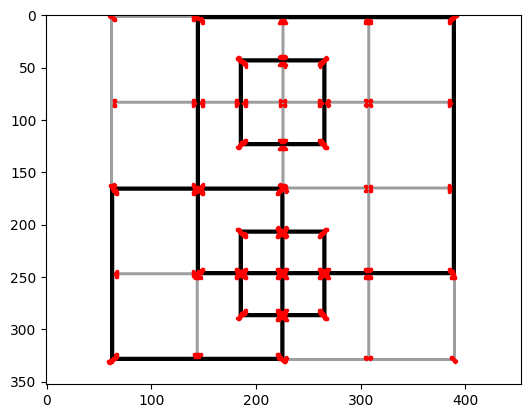

In [9]:
# Plot the edges and corners on pyplot
fig, ax = plt.subplots()
ax.imshow(gray_image, interpolation='nearest', cmap=plt.cm.gray)

# Threshold for corner detection
threshold = 0.01 * np.max(harris_response)

# Mark corners with red dots
for y in range(harris_response.shape[0]):
    for x in range(harris_response.shape[1]):
        if harris_response[y, x] > threshold:
            ax.plot(x, y, 'r.', markersize=3)
